# **INDIAN PINES**

**XG Boost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:11:44] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:11:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:11:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


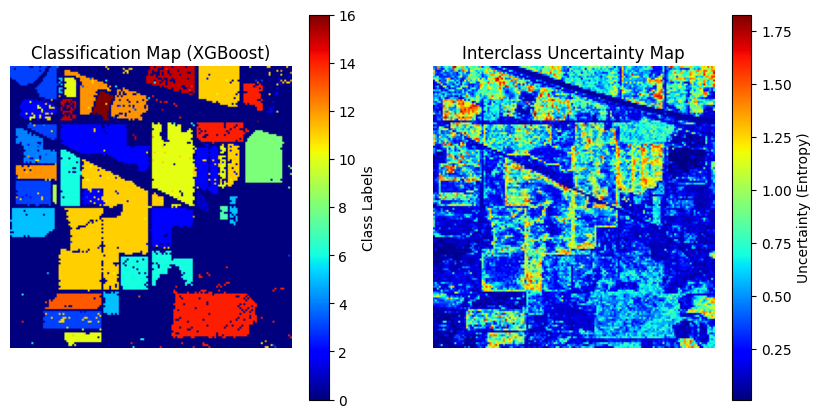

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy.stats import entropy  # For full-class uncertainty

# Load the dataset
file_path = "/content/drive/MyDrive/IndianPines.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values  # 204 Spectral bands
y = df.iloc[:, -1].values   # Class labels (0 to 16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    use_label_encoder=False,
    tree_method="gpu_hist",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1)
model.fit(X_train, y_train)

# Predict class probabilities
y_probs = model.predict_proba(X)  # Probability scores for all pixels
y_pred = np.argmax(y_probs, axis=1)  # Predicted class labels

# Compute **full-class uncertainty** using entropy
uncertainty = entropy(y_probs, axis=1)  # Higher entropy = higher confusion

# Reshape to match Salinas' original dimensions (512 × 217)
classification_map = y_pred.reshape(145, 145)
uncertainty_map = uncertainty.reshape(145, 145)

# Plot Classification Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(classification_map, cmap="jet")
plt.colorbar(label="Class Labels")
plt.title("Classification Map (XGBoost)")
plt.axis("off")

# Plot Full-Class Uncertainty Map (Entropy)
plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map, cmap="jet")
plt.colorbar(label="Uncertainty (Entropy)")
plt.title("Interclass Uncertainty Map")
plt.axis("off")

plt.show()

**Ada Boost**

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


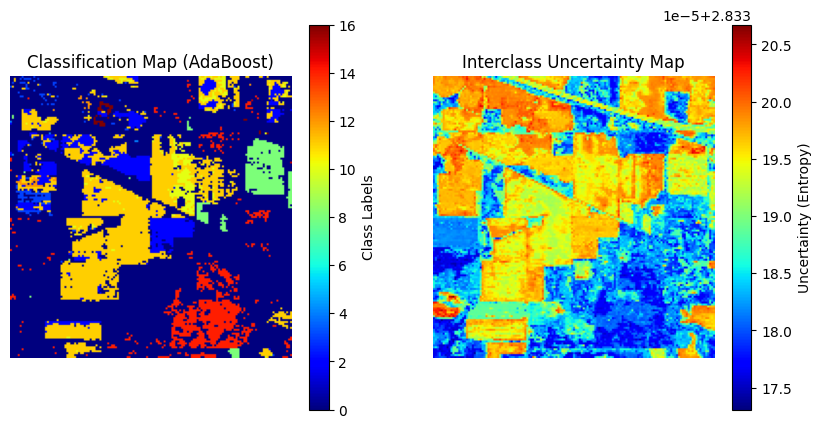

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import entropy  # For full-class uncertainty

# Load the dataset
file_path = "/content/drive/MyDrive/IndianPines.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values  # 204 Spectral bands
y = df.iloc[:, -1].values   # Class labels (0 to 16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # Weak learner
    n_estimators=100,  # Number of weak classifiers
    learning_rate=0.1,
    algorithm="SAMME"
)
model.fit(X_train, y_train)

# Predict class probabilities
y_probs = model.predict_proba(X)  # Probability scores for all pixels
y_pred = np.argmax(y_probs, axis=1)  # Predicted class labels

# Compute **full-class uncertainty** using entropy
uncertainty = entropy(y_probs, axis=1)  # Higher entropy = higher confusion

# Reshape to match Salinas' original dimensions (512 × 217)
classification_map = y_pred.reshape(145, 145)
uncertainty_map = uncertainty.reshape(145, 145)

# Plot Classification Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(classification_map, cmap="jet")
plt.colorbar(label="Class Labels")
plt.title("Classification Map (AdaBoost)")
plt.axis("off")

# Plot Full-Class Uncertainty Map (Entropy)
plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map, cmap="jet")
plt.colorbar(label="Uncertainty (Entropy)")
plt.title("Interclass Uncertainty Map")
plt.axis("off")

plt.show()

**Cat Boost**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip uninstall -y numpy catboost
!pip install numpy catboost --upgrade

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


0:	learn: 2.2220085	total: 15.5ms	remaining: 15.5s
100:	learn: 0.7054697	total: 1.46s	remaining: 13s
200:	learn: 0.5726934	total: 2.91s	remaining: 11.6s
300:	learn: 0.4948439	total: 4.35s	remaining: 10.1s
400:	learn: 0.4384007	total: 5.77s	remaining: 8.62s
500:	learn: 0.3951337	total: 7.17s	remaining: 7.15s
600:	learn: 0.3566610	total: 8.6s	remaining: 5.71s
700:	learn: 0.3256420	total: 10s	remaining: 4.28s
800:	learn: 0.2987862	total: 11.5s	remaining: 2.85s
900:	learn: 0.2731400	total: 12.9s	remaining: 1.42s
999:	learn: 0.2530752	total: 14.3s	remaining: 0us


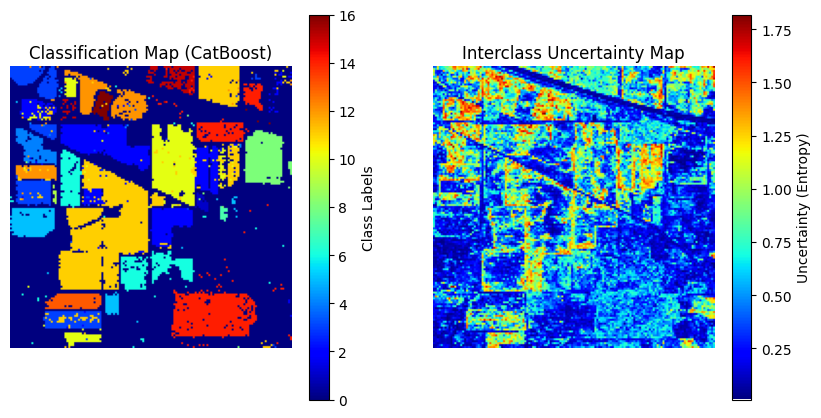

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import entropy  # For full-class uncertainty

# Load the dataset
file_path = "/content/drive/MyDrive/IndianPines.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values  # 204 Spectral bands
y = df.iloc[:, -1].values   # Class labels (0 to 16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train CatBoost model (GPU-enabled)
model = catboost_classifier = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    task_type="GPU",
    verbose=100
)

model.fit(X_train, y_train)

# Predict class probabilities
y_probs = model.predict_proba(X)  # Probability scores for all pixels
y_pred = np.argmax(y_probs, axis=1)  # Predicted class labels

# Compute **full-class uncertainty** using entropy
uncertainty = entropy(y_probs, axis=1)  # Higher entropy = higher confusion

# Reshape to match Salinas' original dimensions (512 × 217)
classification_map = y_pred.reshape(145, 145)
uncertainty_map = uncertainty.reshape(145, 145)

# Plot Classification Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(classification_map, cmap="jet")
plt.colorbar(label="Class Labels")
plt.title("Classification Map (CatBoost)")
plt.axis("off")

# Plot Full-Class Uncertainty Map (Entropy)
plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map, cmap="jet")
plt.colorbar(label="Uncertainty (Entropy)")
plt.title("Interclass Uncertainty Map")
plt.axis("off")

plt.show()

# **SALINAS**

**XG Boost**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:13:16] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:13:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:13:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


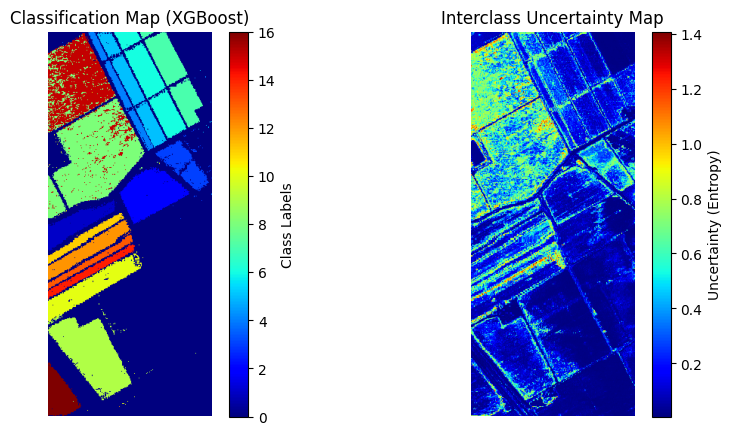

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy.stats import entropy  # For full-class uncertainty

# Load the dataset
file_path = "/content/drive/MyDrive/Salinas_Dataset.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values  # 204 Spectral bands
y = df.iloc[:, -1].values   # Class labels (0 to 16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax",
    num_class=len(np.unique(y)),
    eval_metric="mlogloss",
    use_label_encoder=False,
    tree_method="gpu_hist",
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1)
model.fit(X_train, y_train)

# Predict class probabilities
y_probs = model.predict_proba(X)  # Probability scores for all pixels
y_pred = np.argmax(y_probs, axis=1)  # Predicted class labels

# Compute **full-class uncertainty** using entropy
uncertainty = entropy(y_probs, axis=1)  # Higher entropy = higher confusion

# Reshape to match Salinas' original dimensions (512 × 217)
classification_map = y_pred.reshape(512, 217)
uncertainty_map = uncertainty.reshape(512, 217)

# Plot Classification Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(classification_map, cmap="jet")
plt.colorbar(label="Class Labels")
plt.title("Classification Map (XGBoost)")
plt.axis("off")

# Plot Full-Class Uncertainty Map (Entropy)
plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map, cmap="jet")
plt.colorbar(label="Uncertainty (Entropy)")
plt.title("Interclass Uncertainty Map")
plt.axis("off")

plt.show()

**Ada Boost**

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


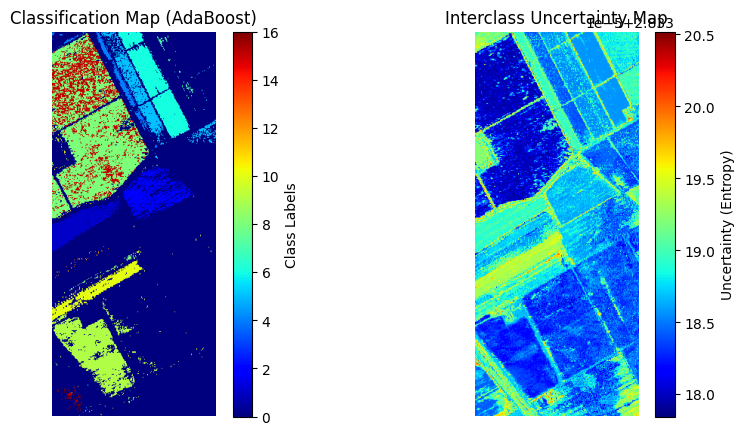

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import entropy  # For full-class uncertainty

# Load the dataset
file_path = "/content/drive/MyDrive/Salinas_Dataset.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values  # 204 Spectral bands
y = df.iloc[:, -1].values   # Class labels (0 to 16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # Weak learner
    n_estimators=100,  # Number of weak classifiers
    learning_rate=0.1,
    algorithm="SAMME"
)
model.fit(X_train, y_train)

# Predict class probabilities
y_probs = model.predict_proba(X)  # Probability scores for all pixels
y_pred = np.argmax(y_probs, axis=1)  # Predicted class labels

# Compute **full-class uncertainty** using entropy
uncertainty = entropy(y_probs, axis=1)  # Higher entropy = higher confusion

# Reshape to match Salinas' original dimensions (512 × 217)
classification_map = y_pred.reshape(512, 217)
uncertainty_map = uncertainty.reshape(512, 217)

# Plot Classification Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(classification_map, cmap="jet")
plt.colorbar(label="Class Labels")
plt.title("Classification Map (AdaBoost)")
plt.axis("off")

# Plot Full-Class Uncertainty Map (Entropy)
plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map, cmap="jet")
plt.colorbar(label="Uncertainty (Entropy)")
plt.title("Interclass Uncertainty Map")
plt.axis("off")

plt.show()

**Cat Boost**

0:	learn: 2.0085105	total: 18.7ms	remaining: 18.7s
100:	learn: 0.3447465	total: 1.79s	remaining: 16s
200:	learn: 0.2845419	total: 3.54s	remaining: 14.1s
300:	learn: 0.2514766	total: 5.28s	remaining: 12.3s
400:	learn: 0.2288309	total: 7.01s	remaining: 10.5s
500:	learn: 0.2129306	total: 8.75s	remaining: 8.72s
600:	learn: 0.1992594	total: 10.5s	remaining: 6.98s
700:	learn: 0.1877700	total: 12.3s	remaining: 5.23s
800:	learn: 0.1780694	total: 14s	remaining: 3.48s
900:	learn: 0.1695219	total: 15.8s	remaining: 1.73s
999:	learn: 0.1618188	total: 17.5s	remaining: 0us


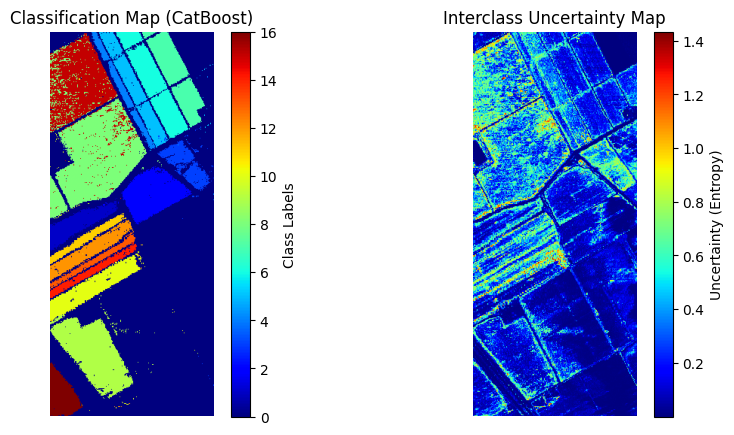

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import entropy  # For full-class uncertainty

# Load the dataset
file_path = "/content/drive/MyDrive/Salinas_Dataset.csv"
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values  # 204 Spectral bands
y = df.iloc[:, -1].values   # Class labels (0 to 16)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train CatBoost model (GPU-enabled)
model = catboost_classifier = CatBoostClassifier(
    iterations=1000,
    depth=6,
    learning_rate=0.1,
    loss_function='MultiClass',
    eval_metric='MultiClass',
    task_type="GPU",
    verbose=100
)

model.fit(X_train, y_train)

# Predict class probabilities
y_probs = model.predict_proba(X)  # Probability scores for all pixels
y_pred = np.argmax(y_probs, axis=1)  # Predicted class labels

# Compute **full-class uncertainty** using entropy
uncertainty = entropy(y_probs, axis=1)  # Higher entropy = higher confusion

# Reshape to match Salinas' original dimensions (512 × 217)
classification_map = y_pred.reshape(512, 217)
uncertainty_map = uncertainty.reshape(512, 217)

# Plot Classification Map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(classification_map, cmap="jet")
plt.colorbar(label="Class Labels")
plt.title("Classification Map (CatBoost)")
plt.axis("off")

# Plot Full-Class Uncertainty Map (Entropy)
plt.subplot(1, 2, 2)
plt.imshow(uncertainty_map, cmap="jet")
plt.colorbar(label="Uncertainty (Entropy)")
plt.title("Interclass Uncertainty Map")
plt.axis("off")

plt.show()